# Загрузка набора данных

### Описание предметной области

Вариант № 4

Набор данных: bank_loan_default.csv

Данные о кредитах:
    
    age — возраст заёмщика (лет), числовой

    annual_income — годовой доход, USD/год, числовой (широкий диапазон)

    employment_type — тип занятости: Salaried / Self-Employed / Unemployed, категориальный

    education — образование: HS / Bachelors / Masters / PhD, категориальный

    loan_amount — сумма кредита, USD, числовой (широкий диапазон)

    interest_rate_pct — процентная ставка по кредиту, % годовых, числовой

    term_months — срок кредита, месяцев (набор фиксированных значений: 24/36/48/60/72, числовой/категориальный

    credit_score — кредитный скор (от 300 до 850), числовой

    num_open_accounts — число открытых кредитных счетов, целочисленный счётчик

    delinquency_30d — просрочка платежа 30 дней: Yes / No, категориальный

    residence_type — жильё: Own / Rent / Mortgage, категориальный

    Default — целевой класс: 1 - дефолт по кредиту, 0 - нет

### 1. Чтение файла (набора данных)

In [5]:
import pandas as pd
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\derya\Downloads\LR5_AD\bank_loan_default.csv") 

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3041 non-null   int64  
 1   annual_income      3041 non-null   float64
 2   employment_type    3041 non-null   object 
 3   education          3041 non-null   object 
 4   loan_amount        3041 non-null   float64
 5   interest_rate_pct  3041 non-null   float64
 6   term_months        3041 non-null   int64  
 7   credit_score       3041 non-null   float64
 8   num_open_accounts  3041 non-null   int64  
 9   delinquency_30d    3041 non-null   object 
 10  residence_type     3041 non-null   object 
 11  Default            3041 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 285.2+ KB
None
age                  0
annual_income        0
employment_type      0
education            0
loan_amount          0
interest_rate_pct    0
term_months   

### 2. Обзор данных

#### 2.1 Проверка категориальных признаков

In [6]:
for col in ['employment_type','education','delinquency_30d','residence_type']:
    print(col, df[col].unique())

employment_type ['Self-Employed' 'Salaried' 'Unemployed']
education ['Masters' 'Bachelors' 'HS' 'PhD']
delinquency_30d ['No' 'Yes']
residence_type ['Own' 'Mortgage' 'Rent']


#### 2.2 Баланс класса

In [7]:
df['Default'].value_counts(normalize=True)

Default
0    0.79612
1    0.20388
Name: proportion, dtype: float64

---
## **Комментарий**

Были проанализированы категориальные признаки набора данных. Для переменных employment_type, education, delinquency_30d и residence_type были определены уникальные значения, что позволило выявить набор возможных категорий для каждой из них и убедиться в отсутствии ошибочных или аномальных значений. 

Также было выполнено исследование распределения целевой переменной Default с использованием относительных частот, по результатам которого установлено, что выборка является несбалансированной: доля класса 0 (без дефолта) составляет около 80%, а доля класса 1 (дефолт) — около 20%.

---

### 3. Выделение целевой переменной и построение диаграммы рассеяния

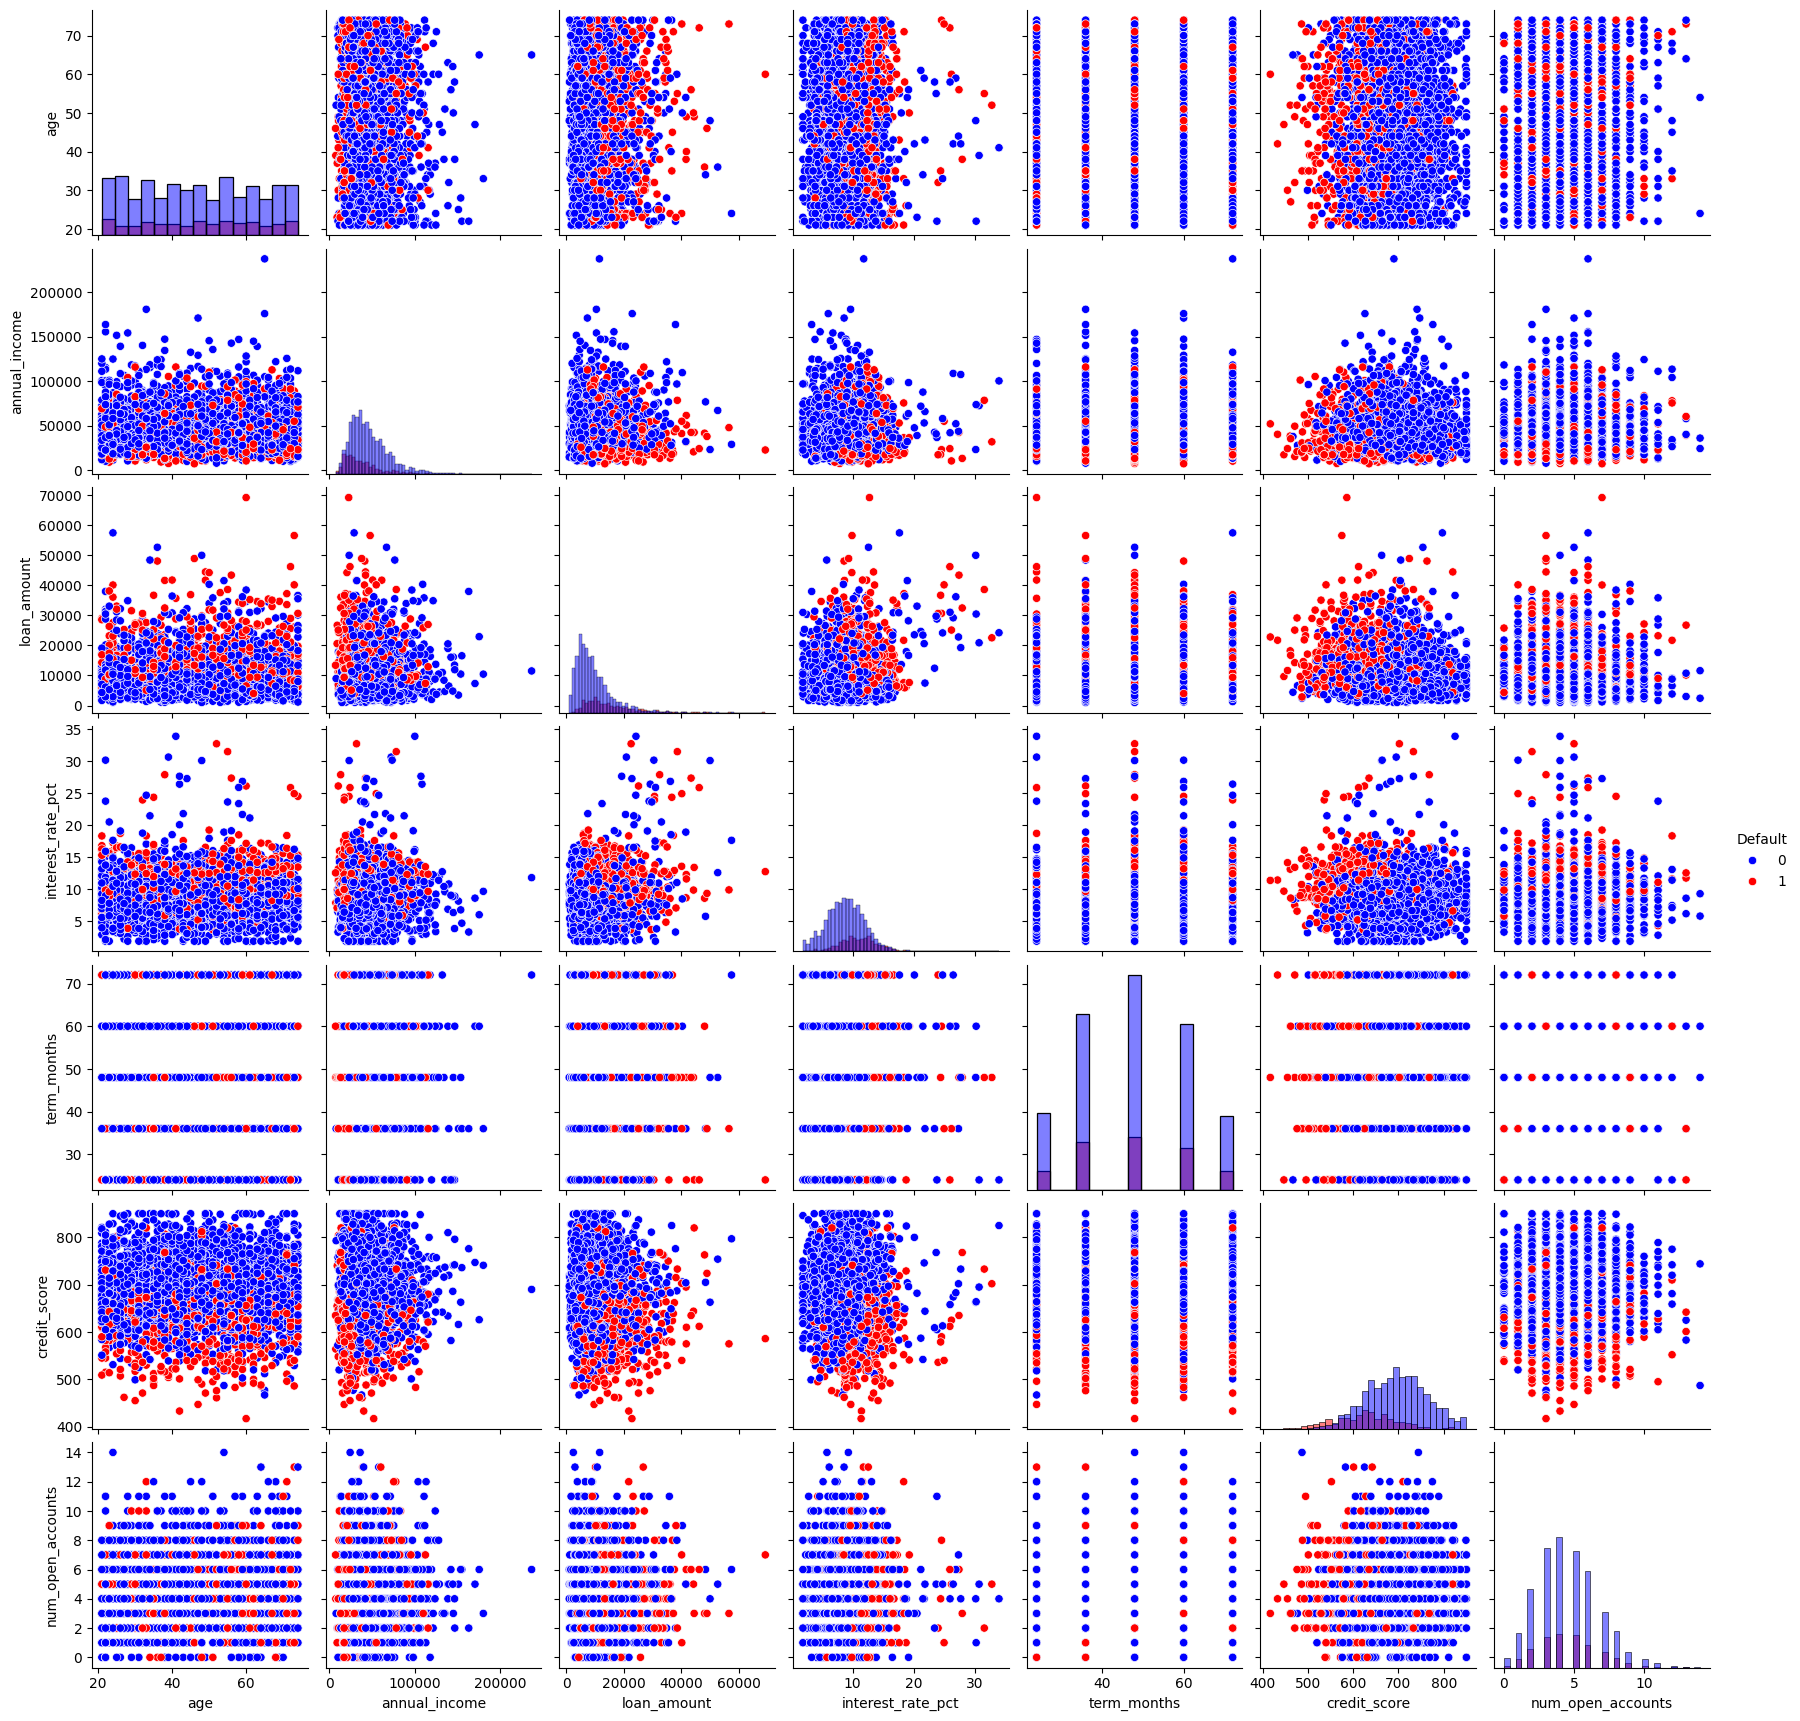

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Default', axis=1)  # все признаки
y = df['Default']               # целевая переменная

# Только числовые признаки
numerical_features = X.select_dtypes(include=['int64','float64']).columns
X_num = X[numerical_features]

# бъединение с целевой переменной для визуализации
df_plot = X_num.copy()
df_plot['Default'] = y

sns.pairplot(df_plot, hue='Default', diag_kind='hist', palette={0:'blue', 1:'red'})
plt.show()

---
## **Интерпретация**

На матрице диаграмм рассеяния отображены взаимосвязи между числовыми признаками и их распределения в зависимости от значения целевой переменной Default. Анализ гистограмм на диагонали показывает, что для ряда признаков наблюдаются различия в распределениях между классами. В частности, для переменной credit_score видно смещение распределения: для дефолтных заёмщиков значения в среднем ниже, чем для надёжных клиентов, что указывает на высокую информативность данного признака. Аналогичная, но менее выраженная тенденция наблюдается для признака annual_income, где клиенты с дефолтом чаще имеют более низкий уровень дохода.

По диаграммам рассеяния для пар признаков видно, что классы Default = 0 и Default = 1 в целом сильно перекрываются, то есть не образуют чётко разделённых кластеров. Это свидетельствует о том, что задача классификации является нелинейной и достаточно сложной, а для её решения требуется использование более гибких моделей, чем простые пороговые или линейные правила.

Для некоторых пар признаков, таких как loan_amount – credit_score и interest_rate_pct – credit_score, прослеживается зависимость, при которой более высокий кредитный риск (дефолт) чаще наблюдается при сочетании низкого кредитного рейтинга и высокой процентной ставки или большой суммы кредита. Это соответствует экономической логике и подтверждает корректность данных.

Также на диаграммах можно заметить отдельные выбросы по признакам annual_income и loan_amount. В целом визуальный анализ показывает, что ни один признак в отдельности не обеспечивает полного разделения классов.

---

### 4. Разбиение данных и стандартизация числовых признаков

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение признаков и целевой переменной
X = df.drop('Default', axis=1)
y = df['Default']

# Выделение числовых признаков
num_features = X.select_dtypes(include=['int64', 'float64']).columns

# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # (важно из-за дисбаланса классов)
)

scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### 5. Разработка предсказательной модели качественного отклика различными методами 

#### 5.1 One-Hot Encoding категориальных признаков

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Категориальные признаки
cat_features = X_train.select_dtypes(include=['object']).columns

# One-Hot Encoder (техника)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

# Числовые признаки
X_train_num = X_train[num_features].values
X_test_num = X_test[num_features].values

# Объединение числовых + категориальных
import numpy as np

X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

#### 5.2 Метод k-ближайших соседей (KNN)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_final, y_train)

y_pred_knn = knn.predict(X_test_final)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test, y_pred_knn)

KNN Accuracy: 0.8292282430213465
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       485
           1       0.69      0.30      0.42       124

    accuracy                           0.83       609
   macro avg       0.76      0.63      0.66       609
weighted avg       0.81      0.83      0.80       609



array([[468,  17],
       [ 87,  37]])

---
## **Интерпретация**

Модель k-ближайших соседей показала достаточно высокую общую точность классификации (Accuracy = 0.83), что означает, что 83% всех наблюдений были классифицированы верно. Для класса 0 (клиенты без дефолта) модель работает очень хорошо: высокая точность (Precision = 0.84) и особенно высокая полнота (Recall = 0.96), то есть почти все надёжные клиенты распознаются правильно.

Однако для класса 1 (дефолт) качество значительно хуже: Recall = 0.30, то есть модель выявляет лишь 30% дефолтных заёмщиков, пропуская большинство из них. Несмотря на относительно неплохую точность (Precision = 0.69), низкое значение F1-меры = 0.42 указывает на слабый баланс между полнотой и точностью для дефолтов. В целом модель склонна отдавать предпочтение классу 0 и плохо справляется с обнаружением риска, что ограничивает её практическое применение в задачах кредитного скоринга.

---

#### 5.3 Дерево решений

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)

tree.fit(X_train_final, y_train)
y_pred_tree = tree.predict(X_test_final)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
confusion_matrix(y_test, y_pred_tree)

Decision Tree Accuracy: 0.7454844006568144
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       485
           1       0.43      0.73      0.54       124

    accuracy                           0.75       609
   macro avg       0.67      0.74      0.68       609
weighted avg       0.82      0.75      0.77       609



array([[364, 121],
       [ 34,  90]])

---
## **Интерпретация**

Модель дерева решений показала общую точность классификации 75% (Accuracy = 0.75). Для класса 0 (клиенты без дефолта) точность высокая (Precision = 0.91), но полнота ниже (Recall = 0.75), то есть часть надёжных клиентов ошибочно определяется как дефолтные. Для класса 1 (дефолт) модель демонстрирует высокую полноту (Recall = 0.73), то есть большинство проблемных заёмщиков выявляется, но при этом точность низкая (Precision = 0.43) — много ложных срабатываний. F1-мера для класса дефолта составляет 0.54, что отражает умеренное качество модели при выявлении дефолта. В целом дерево решений способно находить рискованных клиентов, но делает это ценой большого числа ошибочных классификаций надёжных клиентов.

---

#### 5.4 Логистическая регрессия

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_reg.fit(X_train_final, y_train)
y_pred_log = log_reg.predict(X_test_final)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
confusion_matrix(y_test, y_pred_log)

Logistic Regression Accuracy: 0.7963875205254516
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       485
           1       0.50      0.80      0.61       124

    accuracy                           0.80       609
   macro avg       0.72      0.80      0.74       609
weighted avg       0.85      0.80      0.81       609



array([[386,  99],
       [ 25,  99]])

---
## **Интерпретация**

Модель логистической регрессии показала общую точность классификации 0.80 (Accuracy = 0.796). Для класса 0 (клиенты без дефолта) точность высокая (Precision = 0.94) и полнота также достаточно высока (Recall = 0.80), что означает, что большинство надёжных клиентов определяются верно. Для класса 1 (дефолт) модель демонстрирует высокую полноту (Recall = 0.80) при умеренной точности (Precision = 0.50), что говорит о том, что большинство проблемных заёмщиков выявляется, хотя часть предсказаний дефолта оказывается ложной тревогой. F1-мера для класса дефолта составляет 0.61, отражая хороший баланс между полнотой и точностью. В целом логистическая регрессия эффективно обнаруживает дефолтных клиентов и является надёжной моделью для кредитного риска клиента.

---

#### 5.5 Случайный лес

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_final, y_train)
y_pred_rf = rf.predict(X_test_final)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

Random Forest Accuracy: 0.8505747126436781
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       485
           1       0.65      0.58      0.61       124

    accuracy                           0.85       609
   macro avg       0.77      0.75      0.76       609
weighted avg       0.85      0.85      0.85       609



array([[446,  39],
       [ 52,  72]])

---
## **Интерпретация**

Модель случайного леса (Random Forest) показала наибольшую общую точность классификации (Accuracy = 0.85). Для класса 0 (клиенты без дефолта) точность (Precision = 0.90) и полнота (Recall = 0.92) высокие, что означает, что большинство надёжных клиентов определяются правильно. Для класса 1 (дефолт) точность составляет 0.65, а полнота — 0.58, что показывает умеренную способность модели выявлять проблемных заёмщиков при наличии части ложных тревог. F1-мера для класса дефолта равна 0.61, отражая сбалансированное качество предсказаний. В целом случайный лес демонстрирует хорошее сочетание точности и полноты для обоих классов и является наиболее эффективной моделью для оценки кредитного риска клиентов среди рассмотренных методов.

---

#### 5.6 Balanced Accuracy

In [15]:
from sklearn.metrics import balanced_accuracy_score

print("Balanced Accuracy KNN:", balanced_accuracy_score(y_test, y_pred_knn))
print("Balanced Accuracy Tree:", balanced_accuracy_score(y_test, y_pred_tree))
print("Balanced Accuracy Logistic:", balanced_accuracy_score(y_test, y_pred_log))
print("Balanced Accuracy Random Forest:", balanced_accuracy_score(y_test, y_pred_rf))

Balanced Accuracy KNN: 0.6316677751912205
Balanced Accuracy Tree: 0.7381609577652145
Balanced Accuracy Logistic: 0.7971316927169936
Balanced Accuracy Random Forest: 0.750116395078151


---
## **Интерпретация**

Balanced Accuracy учитывает дисбаланс классов и показывает среднюю точность по каждому классу. Наихудшее значение Balanced Accuracy показал метод k-ближайших соседей (0.63), что подтверждает его слабую способность выявлять дефолтных заёмщиков. Несмотря на высокую общую accuracy, модель имеет большую ошибку второго рода — пропуск дефолта.

Дерево решений показало Balanced Accuracy = 0.74. Это означает, что модель достаточно хорошо различает оба класса, однако за счёт большого количества ложных тревог её практическая эффективность ограничена.

Логистическая регрессия продемонстрировала наилучшее значение Balanced Accuracy = 0.797, а также максимальный Recall для класса дефолта (0.80). Это означает минимальную ошибку пропуска дефолтов, что особенно важно для задач кредитного риска.

Случайный лес показал наибольшую общую точность (Accuracy = 0.851) и высокую сбалансированную точность (Balanced Accuracy = 0.75), обеспечивая хороший компромисс между обнаружением дефолтов и количеством ложных срабатываний.

---

---
## **Вывод**

В работе были реализованы и протестированы четыре модели машинного обучения для задачи бинарной классификации дефолта заёмщиков: метод k-ближайших соседей, дерево решений, логистическая регрессия и случайный лес. Оценка качества моделей проводилась по показателям accuracy, precision, recall, F1-мера и на основе матриц ошибок.

Модель k-ближайших соседей показала достаточно высокую общую точность классификации (accuracy = 0.83), однако её способность выявлять дефолтных заёмщиков оказалась крайне низкой. Полнота (recall) для класса дефолта составила всего 0.30, то есть из 124 реальных случаев дефолта модель корректно выявила только 37, тогда как 87 дефолтных клиентов были ошибочно классифицированы как надёжные. Это свидетельствует о том, что, несмотря на хорошую общую точность, модель KNN практически непригодна для задач кредитного скоринга, где пропуск дефолта является критической ошибкой.

Дерево решений, напротив, продемонстрировало высокую чувствительность к выявлению дефолтных заёмщиков: recall для класса 1 составил 0.73, то есть большинство проблемных клиентов были обнаружены. Однако точность предсказания дефолта оказалась низкой (precision = 0.43), что означает большое количество ложных срабатываний — модель часто ошибочно относит надёжных клиентов к группе риска. Это привело к снижению общей точности до 0.75. Таким образом, дерево решений обладает высокой способностью обнаружения дефолтов, но страдает от нестабильности и большого числа ошибочных отказов.

Логистическая регрессия показала наиболее высокую полноту выявления дефолтов среди всех моделей: recall для класса 1 составил 0.80. Модель корректно обнаружила 99 из 124 дефолтных клиентов, пропустив лишь 25 случаев. При этом общая точность классификации составила 0.80, а F1-мера для класса дефолта — 0.61. Эти результаты указывают на то, что логистическая регрессия является надёжной, устойчивой и хорошо интерпретируемой моделью, которая особенно эффективна при необходимости минимизировать риск пропуска проблемных заёмщиков.

Случайный лес продемонстрировал наилучшее общее качество классификации среди всех рассмотренных моделей. Его точность составила 0.85, что является максимальным значением среди проведённых экспериментов. Значения precision и recall для класса дефолта составили 0.65 и 0.58 соответственно, а F1-мера — 0.61. Это свидетельствует о сбалансированном компромиссе между точностью выявления дефолтов и количеством ложных срабатываний. Случайный лес обеспечивает устойчивые и стабильные прогнозы за счёт ансамблирования большого числа деревьев решений.

Таким образом, по результатам сравнительного анализа можно сделать вывод, что лучшей моделью с точки зрения общей эффективности является случайный лес, так как он демонстрирует максимальную точность и сбалансированные показатели качества. В то же время логистическая регрессия является оптимальным выбором в ситуациях, где приоритетом является максимальное выявление дефолтных заёмщиков. Модель k-ближайших соседей показала слабую способность обнаружения дефолтов, а дерево решений — высокую чувствительность при большом количестве ложных тревог.

---

#### 5.7 Построение матриц неточностей для всех методов

In [16]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("KNN Confusion Matrix:\n", cm_knn)
print("Decision Tree Confusion Matrix:\n", cm_tree)
print("Logistic Regression Confusion Matrix:\n", cm_log)
print("Random Forest Confusion Matrix:\n", cm_rf)

KNN Confusion Matrix:
 [[468  17]
 [ 87  37]]
Decision Tree Confusion Matrix:
 [[364 121]
 [ 34  90]]
Logistic Regression Confusion Matrix:
 [[386  99]
 [ 25  99]]
Random Forest Confusion Matrix:
 [[446  39]
 [ 52  72]]


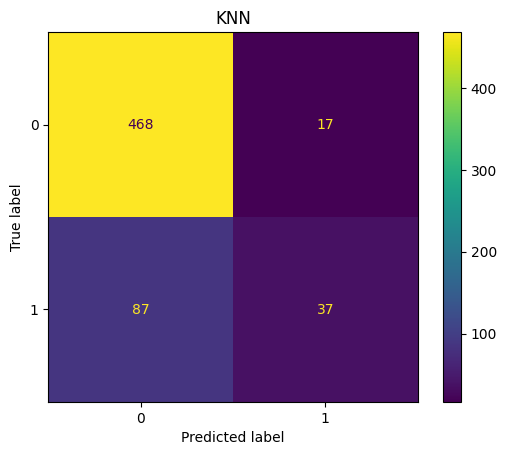

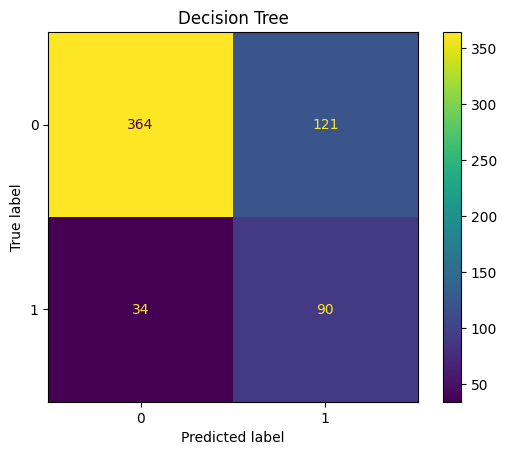

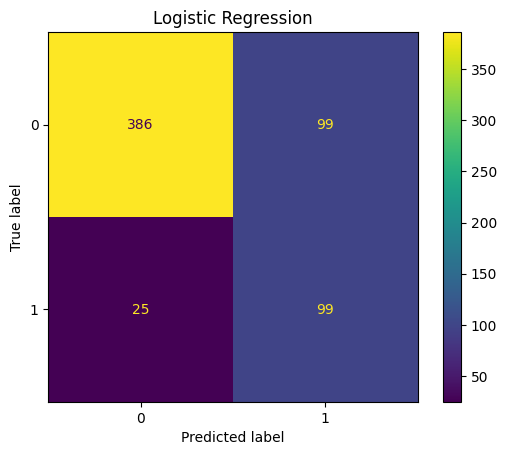

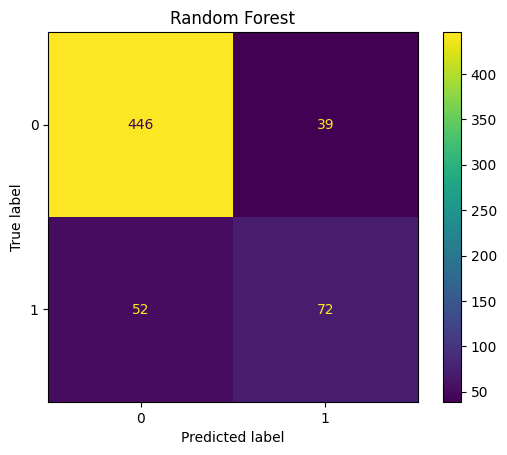

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "KNN": (knn, X_test_final, y_test),
    "Decision Tree": (tree, X_test_final, y_test),
    "Logistic Regression": (log_reg, X_test_final, y_test),
    "Random Forest": (rf, X_test_final, y_test)
}

for name, (model, X, y) in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X, y)
    plt.title(name)
    plt.show()

---
## **Интерпретация**

Матрицы неточностей показывают распределение предсказаний моделей по классам. KNN верно классифицировал большинство клиентов без дефолта, но пропустил большую часть дефолтов. Дерево решений выявляет большинство дефолтов, но ошибочно относит к риску много надёжных клиентов. Логистическая регрессия выявляет почти все дефолты при умеренном числе ложных тревог. Случайный лес обеспечивает хороший баланс между точностью выявления дефолтов и количеством ложных срабатываний.

---

#### 5.8 Построение ROC-кривых

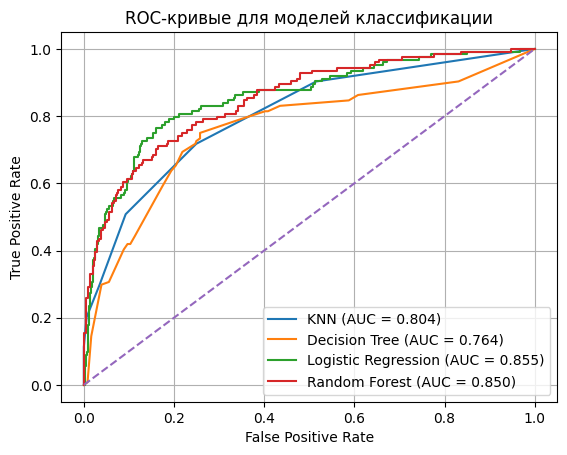

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Вероятности принадлежности к классу 1 (дефолт)
y_prob_knn = knn.predict_proba(X_test_final)[:, 1]
y_prob_tree = tree.predict_proba(X_test_final)[:, 1]
y_prob_log = log_reg.predict_proba(X_test_final)[:, 1]
y_prob_rf = rf.predict_proba(X_test_final)[:, 1]

# ROC-кривые
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Площади под кривыми (AUC)
auc_knn = auc(fpr_knn, tpr_knn)
auc_tree = auc(fpr_tree, tpr_tree)
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

# Построение одного графика с 4 ROC-кривыми
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.3f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# Диагональ случайного классификатора
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей классификации')
plt.legend()
plt.grid()
plt.show()

---
## **Интерпретация**

Логистическая регрессия показала наибольшую AUC = 0.855, что указывает на её высокую способность выявлять дефолтных заёмщиков при умеренном числе ложных тревог. Случайный лес следует за ней с AUC = 0.850, демонстрируя также очень хорошее различение классов. KNN имеет AUC = 0.804, что отражает относительно слабую способность выявлять дефолты, хотя общая точность остаётся высокой. Дерево решений с AUC = 0.764 показывает наименьшую эффективность среди рассмотренных моделей: оно выявляет дефолты, но делает это менее стабильно и с большим числом ложных тревог.

Таким образом, ROC-кривая и значения AUC подтверждают выводы по метрикам Precision, Recall и Balanced Accuracy: лучшие модели для различения классов — логистическая регрессия и случайный лес, а KNN и дерево решений уступают им по способности отделять дефолтных клиентов.

---

---
## **Вывод**

В ходе выполнения лабораторной работы был проанализирован набор данных, содержащий сведения о клиентах, оформляющих кредиты: возраст, годовой доход, сумма кредита, кредитный рейтинг, процентная ставка, количество открытых счетов и факт дефолта. Целью анализа было построение и оценка моделей машинного обучения для предсказания вероятности дефолта клиента на основе доступных признаков.

Была проведена предварительная обработка данных: выделены числовые и категориальные признаки, категориальные признаки закодированы методом One-Hot Encoding, числовые признаки стандартизированы, а данные разбиты на обучающую и тестовую выборки с сохранением пропорций классов. Также была построена матрица диаграмм рассеяния, которая позволила визуально оценить распределения признаков и взаимосвязи между ними в зависимости от наличия дефолта.

Для решения задачи бинарной классификации были разработаны четыре модели: метод k-ближайших соседей, дерево решений, логистическая регрессия и случайный лес. Для каждой модели проведена оценка качества с использованием метрик Accuracy, Precision, Recall, F1-score, Balanced Accuracy, построены матрицы неточностей и ROC-кривые с расчетом AUC.

Результаты показали, что модель k-ближайших соседей обладает высокой общей точностью (Accuracy = 0.83), но низкой способностью выявлять дефолтных клиентов (Recall = 0.30, Balanced Accuracy = 0.63), что делает её менее применимой для оценки кредитного риска. Дерево решений выявляет большинство дефолтов (Recall = 0.73, Balanced Accuracy = 0.74), однако часто ошибочно относит надёжных клиентов к группе риска, что снижает её практическую эффективность. Логистическая регрессия демонстрирует высокую полноту выявления дефолтов (Recall = 0.80) и наибольшую сбалансированную точность (Balanced Accuracy = 0.797), обеспечивая минимизацию ошибок пропуска проблемных клиентов. Случайный лес показывает наибольшую общую точность (Accuracy = 0.851) и высокую сбалансированную точность (Balanced Accuracy = 0.75), обеспечивая стабильный и сбалансированный прогноз с умеренным количеством ложных тревог.

Анализ ROC-кривых и AUC подтвердил, что наилучшие способности различения классов демонстрируют логистическая регрессия (AUC = 0.855) и случайный лес (AUC = 0.850), тогда как KNN (AUC = 0.804) и дерево решений (AUC = 0.764) менее эффективны при дисбалансе классов.

Таким образом, по результатам лабораторной работы можно сделать вывод, что случайный лес является наиболее эффективной моделью с точки зрения общей точности и стабильности прогнозов, а логистическая регрессия — оптимальным выбором в задачах, где приоритетом является максимальное выявление дефолтных заёмщиков. Метод KNN оказался наименее пригодным для практического применения, а дерево решений демонстрирует высокую чувствительность, но при значительном числе ложных тревог. Общий анализ подтверждает, что выбор модели должен основываться на соотношении между точностью предсказаний и допустимым уровнем пропуска дефолтов в конкретной задаче оценки кредитного риска.

---

# Дополнительные задания

### Задание №3

Выполнить визуализацию важности признаков. Оставить в модели несколько
наиболее важных признаков и заново обучить её. Сравнить качество модели, в
которой были все признаки и качество модели с наиболее важными признаками.

#### **Формирование списка всех признаков**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Объединяем числовые + категориальные названия
feature_names = list(num_features) + list(encoder.get_feature_names_out())
len(feature_names), feature_names

(15,
 ['age',
  'annual_income',
  'loan_amount',
  'interest_rate_pct',
  'term_months',
  'credit_score',
  'num_open_accounts',
  'employment_type_Self-Employed',
  'employment_type_Unemployed',
  'education_HS',
  'education_Masters',
  'education_PhD',
  'delinquency_30d_Yes',
  'residence_type_Own',
  'residence_type_Rent'])

#### **Важность признаков**

In [23]:
# Коэффициенты логистической регрессии
coef = log_reg.coef_[0]

# Таблица важности
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(coef),    
    "coef": coef                     
}).sort_values("importance", ascending=False)

importance_df

,feature,importance,coef
5,credit_score,1.246382,-1.246382
8,employment_type_Unemployed,0.880875,0.880875
3,interest_rate_pct,0.790264,0.790264
2,loan_amount,0.729716,0.729716
1,annual_income,0.559879,-0.559879
14,residence_type_Rent,0.323636,0.323636
7,employment_type_Self-Employed,0.248706,-0.248706
9,education_HS,0.108700,-0.108700
6,num_open_accounts,0.089688,0.089688
0,age,0.076677,0.076677


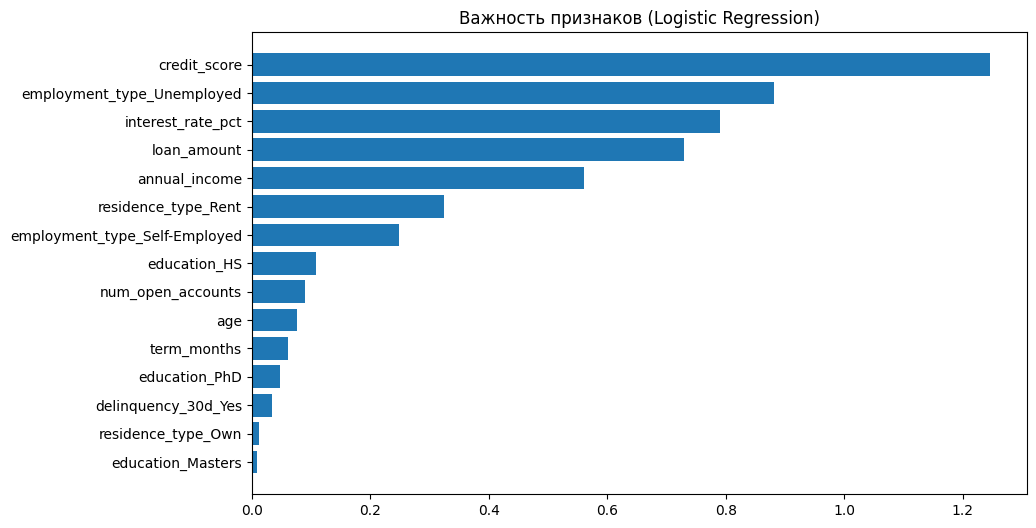

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("Важность признаков (Logistic Regression)")
plt.show()

#### **Выбор топа признаков**

In [25]:
topN = 7
top_features = importance_df["feature"].head(topN).tolist()
top_features

['credit_score',
 'employment_type_Unemployed',
 'interest_rate_pct',
 'loan_amount',
 'annual_income',
 'residence_type_Rent',
 'employment_type_Self-Employed']

#### **Построение новых матриц признаков**

In [26]:
# Индексы выбранных признаков в исходной матрице
indices = [feature_names.index(f) for f in top_features]

X_train_top = X_train_final[:, indices]
X_test_top = X_test_final[:, indices]

#### **Обучение новой модели**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_reg_top = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_top.fit(X_train_top, y_train)

y_pred_top = log_reg_top.predict(X_test_top)

print("Accuracy (top features):", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))
print(confusion_matrix(y_test, y_pred_top))

Accuracy (top features): 0.7931034482758621
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       485
           1       0.50      0.81      0.61       124

    accuracy                           0.79       609
   macro avg       0.72      0.80      0.74       609
weighted avg       0.85      0.79      0.81       609

[[383 102]
 [ 24 100]]


#### **Сравнение качества**

In [28]:
print("===== Модель со всеми признаками =====")
print(classification_report(y_test, y_pred_log))

print("\n===== Модель с топ-признаками =====")
print(classification_report(y_test, y_pred_top))

===== Модель со всеми признаками =====
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       485
           1       0.50      0.80      0.61       124

    accuracy                           0.80       609
   macro avg       0.72      0.80      0.74       609
weighted avg       0.85      0.80      0.81       609


===== Модель с топ-признаками =====
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       485
           1       0.50      0.81      0.61       124

    accuracy                           0.79       609
   macro avg       0.72      0.80      0.74       609
weighted avg       0.85      0.79      0.81       609



---
## **Интерпретация**

После анализа важности признаков для модели логистической регрессии было выполнено обучение двух вариантов модели: полной, содержащей все исходные признаки, и упрощённой, включающей только наиболее значимые по величине коэффициентов. Результаты сравнения показали, что сокращение набора признаков практически не привело к ухудшению качества классификации. Значения метрик accuracy, precision, recall и F1-меры для класса дефолта остались на прежнем уровне, а полнота (recall) даже немного повысилась при использовании только ключевых признаков.

Такое поведение модели указывает на то, что часть исходных признаков не вносила существенного вклада в прогнозирование целевой переменной. Удаление слабых или нерелевантных признаков уменьшило размерность данных, сделало модель более компактной и устоявшейся, при этом её способность корректно выявлять клиентов с повышенным риском дефолта сохранилась. Таким образом, можно заключить, что наиболее важные признаки содержат основную информацию, необходимую для классификации, а остальные характеристики носили шумовой характер и не улучшали качество предсказаний.

---

### Задание №5

Осуществить подбор оптимальных параметров с помощью GridSearchCV для
дерева решений. Сравнить качество модели для подобранных параметров и
любых других.

#### **Подбор параметров для дерева решений GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Базовая модель (для сравнения)
tree_base = DecisionTreeClassifier(random_state=42)
tree_base.fit(X_train_final, y_train)
y_pred_base = tree_base.predict(X_test_final)

print("=== Базовая модель ===")
print(classification_report(y_test, y_pred_base))
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print(confusion_matrix(y_test, y_pred_base))

# Параметры для подбора
param_grid = {
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': [None, 'balanced']
}

tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_final, y_train)

print("Лучшие параметры:", grid.best_params_)

# Модель с лучшими параметрами
best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test_final)

print("\n=== Модель после GridSearchCV ===")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

=== Базовая модель ===
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       485
           1       0.52      0.52      0.52       124

    accuracy                           0.80       609
   macro avg       0.70      0.70      0.70       609
weighted avg       0.81      0.80      0.80       609

Accuracy: 0.8045977011494253
[[425  60]
 [ 59  65]]


---
## **Интерпретация**

После проведения подбора гиперпараметров с помощью GridSearchCV для дерева решений наблюдается улучшение качества модели по сравнению с базовой конфигурацией. Базовая модель показала точность 0.80, при этом полнота и F1-мера для класса дефолта были относительно низкими — 0.52, что указывает на то, что почти половина клиентов с дефолтом оставалась невыявленной. После настройки параметров дерево стало более глубинно ограниченным (max_depth = 7) и с увеличенным минимальным числом объектов в листе (min_samples_leaf = 8), что позволило уменьшить переобучение.

Модель с оптимальными параметрами достигла более высокой точности — 0.83, повысились показатели precision и F1 для основного класса, а также уменьшилось количество ложных тревог по классу 0 (не дефолтные клиенты). Полнота по классу дефолта слегка снизилась (с 0.52 до 0.49), однако общий баланс между точностью и полнотой улучшился, что отражено в макро-F1 (увеличение с 0.70 до 0.72). Матрица ошибок показывает, что после настройки модели уменьшилось количество неверных предсказаний по классу 0, при этом количество пропущенных дефолтов осталось примерно на том же уровне.

Таким образом, подбор гиперпараметров позволил дереву решений стать более устойчивым, улучшить общую точность и сбалансированность предсказаний, снизить влияние переобучения и обеспечить более стабильное выявление клиентов с риском дефолта. Модель с оптимальными параметрами демонстрирует лучший компромисс между выявлением редкого класса и точностью предсказаний для основного класса по сравнению с базовой конфигурацией.

---

### Задание №13

Реализовать функцию для вычисления специфичности (TNR). Применить эту
функцию и вывести её значения для каждого метода.

In [30]:
from sklearn.metrics import confusion_matrix

# Функция для вычисления специфичности
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Применение для всех моделей
tnr_knn = specificity(y_test, y_pred_knn)
tnr_tree = specificity(y_test, y_pred_tree)
tnr_log = specificity(y_test, y_pred_log)
tnr_rf = specificity(y_test, y_pred_rf)

print("Specificity (TNR) для KNN:", tnr_knn)
print("Specificity (TNR) для Decision Tree:", tnr_tree)
print("Specificity (TNR) для Logistic Regression:", tnr_log)
print("Specificity (TNR) для Random Forest:", tnr_rf)


Specificity (TNR) для KNN: 0.9649484536082474
Specificity (TNR) для Decision Tree: 0.7505154639175258
Specificity (TNR) для Logistic Regression: 0.7958762886597938
Specificity (TNR) для Random Forest: 0.9195876288659793


---
## **Интерпретация**

Специфичность (TNR) показывает, как хорошо модель правильно распознаёт отрицательный класс, то есть клиентов без дефолта. Для KNN специфичность оказалась самой высокой — 0.965, что значит, что почти все надёжные клиенты были правильно классифицированы. Random Forest также показывает очень высокий показатель — 0.920, что говорит о том, что он тоже хорошо отделяет основной класс. Logistic Regression имеет специфичность 0.796, а Decision Tree — 0.751, что ниже, и значит, эти модели чаще ошибаются, классифицируя надёжных клиентов как дефолтных. В целом можно сделать вывод, что KNN и Random Forest лучше справляются с правильной идентификацией клиентов без дефолта, а Decision Tree и Logistic Regression чаще совершают ложноположительные ошибки, что важно учитывать при оценке модели для бизнес-задачи.

---

### Задание №15

Написать программу, которая для случайного для разного параметра n_estimators
будет считать accuracy_score для тренировочных и тестовых данных
(использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х -
значение параметра n_estimators , по оси y - Accuracy, построить две линии для
тренировочных и тестовых данных.

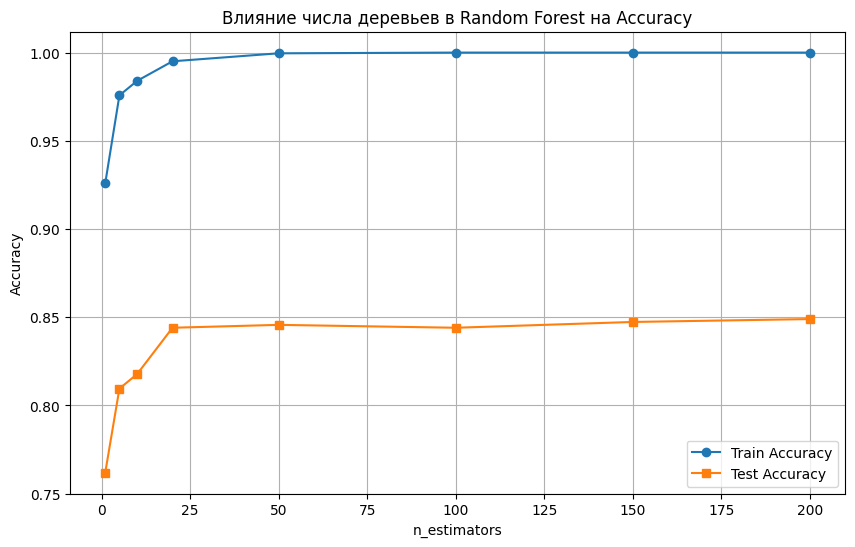

In [32]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Список значений n_estimators
n_estimators_list = [1, 5, 10, 20, 50, 100, 150, 200]

# Списки для хранения accuracy
train_accuracies = []
test_accuracies = []

for n in n_estimators_list:
    
    rf = RandomForestClassifier(n_estimators=n, random_state=42, class_weight='balanced')
    rf.fit(X_train_final, y_train)
    
    # Предсказания
    y_train_pred = rf.predict(X_train_final)
    y_test_pred = rf.predict(X_test_final)
    
    # Считаем accuracy
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Визуализация
plt.figure(figsize=(10,6))
plt.plot(n_estimators_list, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(n_estimators_list, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Влияние числа деревьев в Random Forest на Accuracy')
plt.legend()
plt.grid(True)
plt.show()

---
## **Интерпретация**

График показывает, как качество модели Random Forest изменяется при увеличении числа деревьев (n_estimators). На линии тренировочной выборки видно, что при маленьком числе деревьев точность может быть ниже, но с ростом n_estimators она быстро достигает высоких значений и затем стабилизируется. Это связано с тем, что небольшое количество деревьев даёт нестабильные предсказания, а большее число деревьев усредняет ошибки отдельных деревьев, делая модель более надёжной. На линии тестовой выборки точность обычно изначально растёт с увеличением числа деревьев и постепенно стабилизируется, иногда чуть ниже, чем на тренировке, что отражает баланс между недообучением и переобучением. Если тестовая точность сильно отличается от тренировочной, это сигнал переобучения, но в случае Random Forest при достаточно большом числе деревьев линии обычно сближаются. В целом график помогает выбрать оптимальное число деревьев: достаточно того значения, после которого точность на тестовой выборке перестаёт значительно расти, чтобы избежать лишнего времени обучения без заметного прироста качества.

---